In [2]:
## Import des bibliothèque
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
dataset = datasets.load_iris()

In [6]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Les données sont sous la forme d'un dictionnaire ou les valeurs sont des array.

### On va donc extraire les valeurs de la clé data

In [6]:
data = dataset['data']
target = dataset['target']


In [9]:
#evaluons la taille des données à traiter
np.shape(data)

(150, 4)

## 2. Visualisation des données 

### Pour la visualisation des données, on va user de la bibliothèque matplotlib

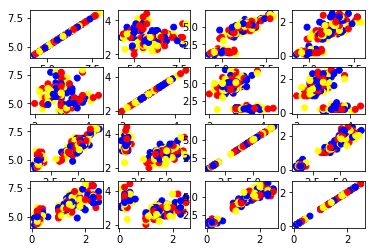

In [15]:
for i in range(4):
    for j in range(4):
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(data[:,i],data[:,j],c=['red','blue','yellow'])
plt.show()

In [16]:
import matplotlib.pyplot as plt

Au vu des graphiques, on a déja un présentiment de corrélation entre les variables: (1,3),(1,4)et (3,4)

### Analyse univariée

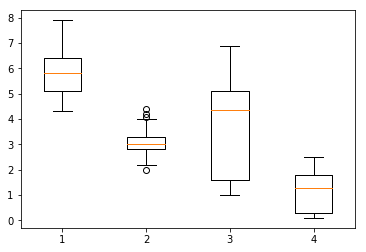

In [18]:
plt.boxplot(data)
plt.show()

Les ordres de grandeur sont quasiment les mêmes. Une normalisation n'est pas utile
La variable 2 comporte de nombreuses valeurs potentiellement abérantes.
La variable 3 a une forte dispersion  : elle a un écart-type relativement grand.
Observons les résultats numériquement avec la méthode describe du package Python

In [19]:
import pandas as pd
df = pd.DataFrame(data)

In [20]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Analyse bivariée

In [21]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,0,1,2,3
0,1,-0.109369,0.871754,0.817954
1,-0.109369,1,-0.420516,-0.356544
2,0.871754,-0.420516,1,0.962757
3,0.817954,-0.356544,0.962757,1


### La matrice de correlation confirme notre ressenti sur les valeurs corrolées. De plus vu que les nuages de point sont linéaires, la notion de correlation à tout son sens.

La valeur 2 est unique et n'a aucune relation avec ses homologues
Par contre les autres variables présentent de fort signe de corrélation
On pourrait donc réduire le problème à deux variables parce que ces variables correlées propagent
les mêmes informations. 


## 2/ Normalisation

    split data

In [25]:
Xa,Xv, Ya, Yv = train_test_split(data,target)

In [26]:
print("Dimension du jeu d'apprentissage :")
print(np.shape(Xa))
print("Dimension du jeu de validation :")
print(np.shape(Xv))


Dimension du jeu d'apprentissage :
(112, 4)
Dimension du jeu de validation :
(38, 4)


In [27]:
df2 = pd.DataFrame(Xa)

In [28]:
df2.describe()

,0,1,2,3
count,112.000000,112.000000,112.000000,112.000000
mean,5.892857,3.060714,3.841964,1.227679
std,0.796921,0.466800,1.746329,0.754949
min,4.400000,2.000000,1.200000,0.100000
25%,5.200000,2.800000,1.600000,0.375000
50%,5.800000,3.000000,4.500000,1.350000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
normalize = df2.apply(lambda x: (x-x.mean())/x.std())

In [30]:
normalize.describe()

,0,1,2,3
count,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
mean,-1.601893e-15,-3.437726e-15,-3.984908e-16,4.064209e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.873280e+00,-2.272310e+00,-1.512868e+00,-1.493715e+00
25%,-8.694172e-01,-5.585140e-01,-1.283816e+00,-1.129452e+00
50%,-1.165198e-01,-1.300649e-01,3.768109e-01,1.620261e-01
75%,6.363775e-01,5.661648e-01,7.203888e-01,7.580930e-01
max,2.518621e+00,2.869079e+00,1.751122e+00,1.685308e+00


La moyenne est bien quasi nulle et l'écart type autour de 1.
On a bien centrée et reduit notre jeu de données

## Normalisons maintenant notre jeu de données avec sklearn

In [31]:
from sklearn.preprocessing import StandardScaler 

scl = StandardScaler()
normalize_sklearn = scl.fit(Xa)

Xn = normalize_sklearn.transform(Xa)

print("Moyenne :")
print(Xn.mean(axis=0))
print(" Ecart-type: ")
print(Xn.std(axis=0))

Moyenne :
[-1.58603289e-15 -3.38419768e-15 -4.24263799e-16  3.15224037e-16]
 Ecart-type: 
[1. 1. 1. 1.]


### Les valeurs sont bien normalisées au vu des valeurs de moyenne et d'ecart-type obtenu

## 3/ Methode des k plus proches voisin

In [32]:
from sklearn.neighbors import KNeighborsClassifier
resultat_apprentissage = []

# Determinons le nombre optimal de k 

for i in range(3,30):
    voisins = KNeighborsClassifier(n_neighbors=i)
    voisins.fit(Xa,Ya)
    resultat_apprentissage.append(voisins.score(Xa,Ya))

index_max_values = resultat_apprentissage.index(max(resultat_apprentissage))
index_max_values = index_max_values + 3 

# Test pour le max 

voisins = KNeighborsClassifier(n_neighbors=index_max_values)
voisins.fit(Xa,Ya)
print("La valeur du meilleur k est :"+str(index_max_values))
print("Performance sur le jeu de d'apprentissage :"+str(voisins.score(Xa,Ya)))
print("Performance sur le jeu de de test :"+str(voisins.score(Xv,Yv)))


La valeur du meilleur k est :13
Performance sur le jeu de d'apprentissage :0.9910714285714286
Performance sur le jeu de de test :0.9736842105263158


## 4/ Methode des k plus proches voisins avec un jeu de validation intermediaire

In [332]:
Xa,X_test, Ya, Y_test = train_test_split(data,target)
Xa, X_val, Ya, Y_val = train_test_split(Xa,Ya) 

scl = StandardScaler()
normalize_sklearn = scl.fit(Xa)

Xn = normalize_sklearn.transform(Xa)
normalize_sklearn = scl.fit(X_val)
X_valN = scl.transform(X_val)

In [333]:
k_values = [i for i in range(3,30)]
perf_val=[]
perf_app = []

for j in k_values:
    knn = KNeighborsClassifier(j)
    knn.fit(Xn,Ya)
    perf_app.append(knn.score(Xn,Ya))
    perf_val.append(knn.score(X_valN,Y_val))
    
best_k_value_app = k_values[np.argmax(perf_app)]
best_k_value_val = k_values[np.argmax(perf_val)]

In [334]:
print("La valeur du meilleur k sur l'apprentissage :"+str(best_k_value_app))

# On fait l'entrainement a partir du k obtenu
knn = KNeighborsClassifier(best_k_value_app)
knn.fit(Xn,Ya)

# on test ! 
print("Performance sur le jeu de d'apprentissage :"+str(knn.score(X_valN,Y_val)))
print("La valeur du meilleur k sur le jeu de validation :"+str(best_k_value_val))

X_testN = scl.transform(X_test)
print("Performance sur le jeu de test :"+str(knn.score(X_testN,Y_test)))

La valeur du meilleur k sur l'apprentissage :7
Performance sur le jeu de d'apprentissage :0.8928571428571429
La valeur du meilleur k sur le jeu de validation :20
Performance sur le jeu de test :0.9736842105263158


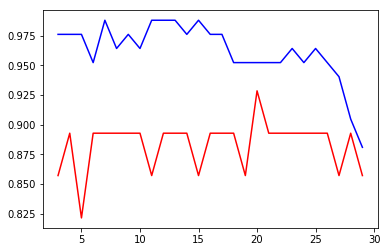

In [335]:
plt.plot(k_values,perf_val,'r')
plt.plot(k_values,perf_app,'b')

# 5/ Variation des jeux d'apprentissage et d'évaluation

### On compte supprimer le biais dû à un choix arbitraire d'un découpage au profit d'un autre. Pour cela, on réalise une cross-validation.

In [336]:
from sklearn.model_selection  import KFold

kf = KFold(n_splits=3)

perf_val = [[],[],[]]
decoupage = 0

for train, val in kf.split(Xa):
    x_train = Xa[train,:]
    y_train = Ya[train]
    x_val = Xa[val,:]
    y_val = Ya[val]
      
    for k in k_values:
        knn = KNeighborsClassifier(k)
        knn.fit(x_train,y_train)
        perf_val[decoupage].append(knn.score(x_val, y_val))
    decoupage += 1 

In [337]:
perf_globale = np.zeros((len(k_values),1))
for i in range(0,len(k_values)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale[i] /= 3

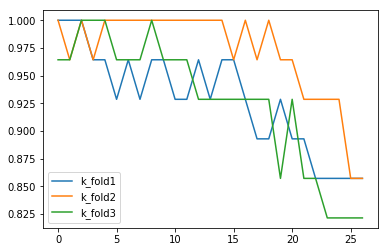

In [338]:
plt.plot(perf_val[0], label='k_fold1')
plt.plot(perf_val[1], label='k_fold2')
plt.plot(perf_val[2], label='k_fold3')
plt.legend(loc='lower left')


### Pour determiner la performance du modèle, on fait la moyenne des differentes performances obtenues sur chaque sous-jeu de données.

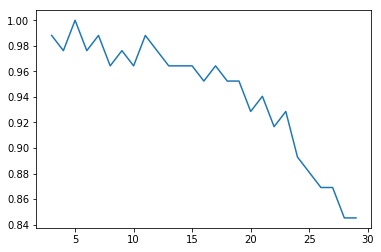

In [339]:
best_perf = np.argmax(perf_globale)
plt.plot(k_values,perf_globale)

In [340]:
k_values[np.argmax(perf_globale)]

5

### Le k optimal correspond à k=5

# II- Données WhiteW

### 1- Analyse sommaire des données 

### Chargement des données 

In [48]:
whiteW = datasets.load_wine()

In [50]:
whiteW

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [79]:
dataWhiteW = whiteW['data']
targetWhiteW = whiteW['target']

In [53]:
np.shape(dataWhiteW)

(178, 13)

### Le jeu de données représente 178 observations par rapport à 13 caractéristiques données

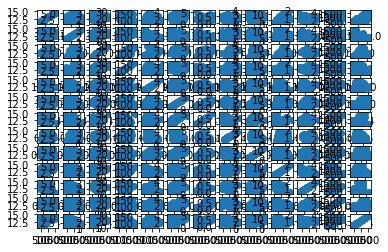

In [56]:
for i in range(13):
    for j in range(13):
            plt.subplot(13,13,i*13+j+1)
            plt.scatter(dataWhiteW[:,i],dataWhiteW[:,j],cmap="rainbow")
plt.show()

### Le jeu de données est trop large pour évaluer tout les nuages de points.
### Nous allons evaluer les potentiels correlations entre les points et représenter 
### les nuages de point pour confirmer une corrélation entre ces caractéristique.

## Analyse bivariée

In [59]:
df3 = pd.DataFrame(dataWhiteW)
correlation2 = df3.corr()
correlation2.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0.0943969,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.0717472,0.0723432,0.64372
1,0.0943969,1,0.164045,0.2885,-0.0545751,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.36871,-0.192011
2,0.211545,0.164045,1,0.443367,0.286587,0.12898,0.115077,0.18623,0.00965194,0.258887,-0.0746669,0.00391123,0.223626
3,-0.310235,0.2885,0.443367,1,-0.0833331,-0.321113,-0.35137,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
4,0.270798,-0.0545751,0.286587,-0.0833331,1,0.214401,0.195784,-0.256294,0.236441,0.19995,0.0553982,0.0660039,0.393351
5,0.289101,-0.335167,0.12898,-0.321113,0.214401,1,0.864564,-0.449935,0.612413,-0.0551364,0.433681,0.699949,0.498115
6,0.236815,-0.411007,0.115077,-0.35137,0.195784,0.864564,1,-0.5379,0.652692,-0.172379,0.543479,0.787194,0.494193
7,-0.155929,0.292977,0.18623,0.361922,-0.256294,-0.449935,-0.5379,1,-0.365845,0.139057,-0.26264,-0.50327,-0.311385
8,0.136698,-0.220746,0.00965194,-0.197327,0.236441,0.612413,0.652692,-0.365845,1,-0.0252499,0.295544,0.519067,0.330417
9,0.546364,0.248985,0.258887,0.018732,0.19995,-0.0551364,-0.172379,0.139057,-0.0252499,1,-0.521813,-0.428815,0.3161


### Il y a très peu de variables potentiellement corrélées : 
### La variable 5 et la variable 6 (0.86)
### La variable 7 et 11 ( 0.78 ) 

### Observons les nuages de points associés à ces points 

Text(0,0.5,'Variable 11 ')

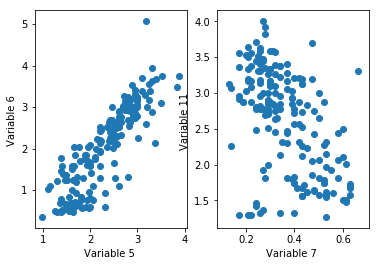

In [64]:
plt.subplot(1,2,1)
plt.scatter(dataWhiteW[:,5],dataWhiteW[:,6],cmap="rainbow")
plt.xlabel("Variable 5 ")
plt.ylabel("Variable 6 ")
plt.subplot(1,2,2)
plt.scatter(dataWhiteW[:,7],dataWhiteW[:,11],cmap="rainbow")
plt.xlabel("Variable 7 ")
plt.ylabel("Variable 11 ")

### Les nuages de points sont linéaires. Il y a bien corrélation entre les variables. 

## Analyse univariée

In [87]:
df3.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### On a des ordres de grandeurs très disparâtre pour certaines des caractéristiques : Variable 1,3,4,13 ( moyenne respective de 13, 19,99,746)
### Cependant, les variables présentant une forte dispertion sont la 13 ( std = 314) et la 5 (14)

## Dans tout les cas, il convient de normaliser les données pour eviter qu'une d'entre elles effacent une autre. Pour cela, nous allons separer le jeu de données pour éviter de toucher au jeu de test

In [458]:
Xa,Xv, Ya, Yv = train_test_split(dataWhiteW,targetWhiteW)

In [459]:
from sklearn.preprocessing import StandardScaler 


Xa,X_test, Ya, Y_test = train_test_split(dataWhiteW,targetWhiteW)
Xa, X_val, Ya, Y_val = train_test_split(Xa,Ya) 

scl2 = StandardScaler()

normalize_sklearn2 = scl2.fit(Xa)
Xn = normalize_sklearn2.transform(Xa)

normalize_sklearn2 = scl.fit(X_val)
X_valN = scl.transform(X_val)

normalize_sklearn2 = scl.fit(X_test)
Xt = scl.transform(X_test)

print("Moyenne :")
print(Xn.mean(axis=0))
print(" Ecart-type: ")
print(Xn.std(axis=0))

Moyenne :
[ 1.65187729e-15 -7.18280654e-16  4.11343238e-15  1.00705078e-15
 -1.50272611e-16  1.98003791e-15  2.37744729e-16 -6.95291187e-16
  3.40636610e-16  1.60365548e-16 -6.72862439e-18 -5.60718699e-17
 -1.12143740e-18]
 Ecart-type: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### On a bien un jeu de donnée centrée réduit

### 2 - Classification

In [460]:
from sklearn.model_selection  import KFold

k_values = [i for i in range(3,30)]
kf = KFold(n_splits=3)

perf_val = [[],[],[]]
decoupage = 0

for train, val in kf.split(Xn):
    Xap = Xn[train,:]
    Yap = Ya[train]
    Xv = Xn[val,:]
    Yv = Ya[val]
      
    for k in k_values:
        knn = KNeighborsClassifier(k)
        knn.fit(Xap,Yap)
        perf_val[decoupage].append(knn.score(Xv, Yv))
    decoupage += 1 

In [461]:
perf_globale = np.zeros((len(k_values),1))
for i in range(0,len(k_values)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale[i] /= 3

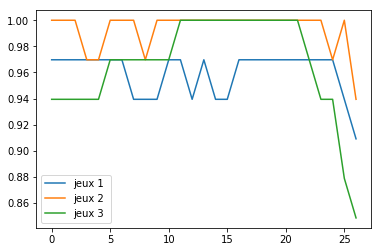

In [462]:
plt.plot(perf_val[0], label='jeux 1')
plt.plot(perf_val[1], label='jeux 2 ')
plt.plot(perf_val[2], label='jeux 3')
plt.legend(loc='lower left')


In [463]:
best_k_values = k_values[np.argmax(perf_globale)]

# le k* vaut : 

In [464]:
best_k_values

14

In [465]:
print("La valeur du meilleur k sur le jeu de validation :"+str(best_k_values)+"\n")

# On fait l'entrainement a partir du meilleur k obtenu sur la validation

knn = KNeighborsClassifier(best_k_values)
knn.fit(Xn,Ya)
print("Performance sur le jeu de d'apprentissage :"+str(knn.score(Xn,Ya))+"\n")

# on test ! 

print("Performance sur le jeu de de validation :"+str(knn.score(X_valN,Y_val)))


X_testN = scl2.transform(X_test)
print("Performance sur le jeu de test :"+str(knn.score(Xt,Y_test)))

La valeur du meilleur k sur le jeu de validation :14

Performance sur le jeu de d'apprentissage :0.98989898989899

Performance sur le jeu de de validation :0.9411764705882353
Performance sur le jeu de test :0.9333333333333333


### le modèle arrive à avoir de très bon résultat sur le jeu de test pour le k optimal du jeu de validation. En répétant le test pour plusieurs séparations distinctes, le résultat oscille entre 90 et 100%. 
### Les résultats entre les jeux de d'apprentissage et de validation sont eux aussi entre 90 et 100%. Par contre, suivant le découpage, il peut arriver que les performances sur le jeu de validation soit meilleures et vice versa

## 2-2-3 Pour aller plus loin 

In [466]:
from sklearn.model_selection  import KFold

k_values = [i for i in range(3,30)]
kf = KFold(n_splits=3)

perf_val = [[],[],[]]
decoupage = 0

for train, val in kf.split(Xn):
    Xap = Xa[train,:]
    Yap = Ya[train]
    Xv = Xa[val,:]
    Yv = Ya[val]
      
    for k in k_values:
        knn = KNeighborsClassifier(k)
        knn.fit(Xap,Yap)
        perf_val[decoupage].append(knn.score(Xv, Yv))
    decoupage += 1 

In [467]:
print("La valeur du meilleur k sur le jeu de validation :"+str(best_k_value_val)+"\n")

# On fait l'entrainement a partir du meilleur k obtenu sur la validation

knn = KNeighborsClassifier(best_k_value_val)
knn.fit(Xa,Ya)
print("Performance sur le jeu de d'apprentissage :"+str(knn.score(Xa,Ya))+"\n")

# on test ! 

print("Performance sur le jeu de de validation :"+str(knn.score(X_val,Y_val)))


print("Performance sur le jeu de test :"+str(knn.score(X_test,Y_test)))

La valeur du meilleur k sur le jeu de validation :20

Performance sur le jeu de d'apprentissage :0.7474747474747475

Performance sur le jeu de de validation :0.6176470588235294
Performance sur le jeu de test :0.6888888888888889


### Les resultats hors normalisation ne sont pas brillants. Le modèle arrive à prévoir correctement les targets 60-70 % du temps. Ce qui est relativement mauvais par rapport au résultat obtenu sur les données normalisées 
### Cela confirme notre préssentiment lors de la phase d'analyse statistique. Les variables 1,3,4,13 doivent effacer d'autres caractéristiques du fait de leur valeurs trop importantes par rapport aux autres.